<a href="https://colab.research.google.com/github/constructor-s/aps1080_winter_2021/blob/main/A3/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exercise III: Cart-Pole with TD(0)

    Due Monday by 11:59pm Points 100 Submitting a file upload File Types pdf

> Solve the Cart-Pole control problem using TD(0) methods.
> 
> For control use
> 
> a. on-policy SARSA
> 
> b. off-policy Q learning
> 
> c. off-policy Expected SARSA with an epsilon-greedy policy
> 
>  
> 
> This is to prepare you for the next assignment which will be a slight extension of TD(0).

In [53]:
#%% Boilerplate setup

import gym, numpy as np, matplotlib.pyplot as plt

# Discretization of states

"""
Observation:
    Type: Box(4)
    Num     Observation               Min                     Max
    0       Cart Position             -4.8                    4.8
    1       Cart Velocity             -Inf                    Inf
    2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
    3       Pole Angular Velocity     -Inf                    Inf
The episode ends when the pole is more than 15 degrees from vertical, 
or the cart moves more than 2.4 units from the center.
"""

def obs2state(obs):
    """
    Discretize observations to states
    """
    digitized = [np.searchsorted(bins, o, "right") 
            for o, bins in zip(obs, obs2state.bin_divide)]
    return (digitized * obs2state.multiplier).sum()
obs2state.bin_divide = (
        np.linspace(-2.3, +2.3, 3),
        np.linspace(-1.0, +1.0, 3),
        np.linspace(-0.20, +0.20, 3),
        np.linspace(-1.0, +1.0, 3),
        )
obs2state.multiplier = 4**np.arange(4); obs2state.S = 4**4
# obs2state.bin_divide = ([0],[0],[0],[0])
# obs2state.multiplier = 2**np.arange(4); obs2state.S = 2**4

def test_cart_pole(policy_fun, env=gym.make("CartPole-v0"), 
                   max_iter=1000):
    """
    Test the policy against the environment

    Parameters
    ------------------
    policy_fun : function
        A funtion that takes the discretized state from the CartPole 
        environment and returns a valid action of the environment

    Yields
    ------
    S_t, A_t, R_t+1, S_t+1, A_t+1, done
        SARSA pairs. S is the discretized state
    """
    obs = env.reset(); s = obs2state(obs)
    a = policy_fun(s)
    for i in range(max_iter):
        next_obs, r, done, info = env.step(a); next_s = obs2state(next_obs)
        next_a = policy_fun(next_s)
        yield s, a, r, next_s, next_a, done
        obs, s, a = next_obs, next_s, next_a
        if done:
            break
    env.close()

# Test that the function works
rng = np.random.RandomState(0)
print("\n".join(map(str, enumerate(test_cart_pole(lambda _: rng.randint(0, 2))))))

(0, (102, 0, 1.0, 166, 1, False))
(1, (166, 1, 1.0, 166, 1, False))
(2, (166, 1, 1.0, 106, 0, False))
(3, (106, 0, 1.0, 166, 1, False))
(4, (166, 1, 1.0, 106, 1, False))
(5, (106, 1, 1.0, 106, 1, False))
(6, (106, 1, 1.0, 106, 1, False))
(7, (106, 1, 1.0, 42, 1, False))
(8, (42, 1, 1.0, 26, 1, False))
(9, (26, 1, 1.0, 30, 1, False))
(10, (30, 1, 1.0, 30, 0, False))
(11, (30, 0, 1.0, 30, 0, False))
(12, (30, 0, 1.0, 26, 1, False))
(13, (26, 1, 1.0, 30, 0, False))
(14, (30, 0, 1.0, 10, 0, True))


In [84]:
#%% on-policy SARSA
# page 130

alpha = 0.500
eps = 0.001
gamma = 0.999

num_S = obs2state.S
num_A = 2
rng = np.random.RandomState(0)

Q = rng.random([num_S, num_A])

training_hist = []
try:
    for episode_i in range(10000):
        policy_fun = lambda s: rng.choice((np.argmax(Q[s]), rng.randint(num_A)), p=(1-eps, eps))
        for step_i, (s, a, r, s_, a_, done) in enumerate(test_cart_pole(policy_fun)):
            Q[s, a] = Q[s, a] + alpha * (r + gamma * Q[s_, a_] * (1-done) - Q[s, a])
        training_hist.append((episode_i, step_i))
        if episode_i % 500 == 0:
            print(f"Training: Episode {episode_i} lasted {step_i} steps")
except KeyboardInterrupt:
    pass
finally:
    print(f"Training: Episode {episode_i} lasted {step_i} steps")
    training_hist = np.array(training_hist)

Training: Episode 0 lasted 39 steps
Training: Episode 500 lasted 48 steps
Training: Episode 1000 lasted 106 steps
Training: Episode 1500 lasted 183 steps
Training: Episode 2000 lasted 199 steps
Training: Episode 2500 lasted 76 steps
Training: Episode 3000 lasted 199 steps
Training: Episode 3500 lasted 151 steps
Training: Episode 4000 lasted 178 steps
Training: Episode 4500 lasted 80 steps
Training: Episode 5000 lasted 199 steps
Training: Episode 5500 lasted 198 steps
Training: Episode 6000 lasted 199 steps
Training: Episode 6500 lasted 199 steps
Training: Episode 6856 lasted 173 steps


Text(0, 0.5, 'Performance (steps)')

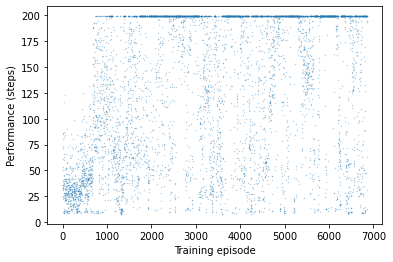

In [85]:
plt.scatter(training_hist[:, 0], training_hist[:, 1], s=0.1, alpha=0.5)
plt.xlabel("Training episode")
plt.ylabel("Performance (steps)")

In [86]:
for episode_i in range(10):
    policy_fun = lambda s: np.argmax(Q[s])
    for step_i, (s, a, r, s_, a_, done) in enumerate(test_cart_pole(policy_fun)):
        pass
    print(f"Testing: Episode {episode_i} lasted {step_i} steps")

Testing: Episode 0 lasted 199 steps
Testing: Episode 1 lasted 199 steps
Testing: Episode 2 lasted 199 steps
Testing: Episode 3 lasted 199 steps
Testing: Episode 4 lasted 199 steps
Testing: Episode 5 lasted 199 steps
Testing: Episode 6 lasted 199 steps
Testing: Episode 7 lasted 199 steps
Testing: Episode 8 lasted 199 steps
Testing: Episode 9 lasted 199 steps
